In [81]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import math
import csv

In [2]:
splitCompo = pd.read_csv("/home/sourav/Desktop/nlp project/nlpSpliComp.txt", sep='\t').drop(0)


In [3]:
print splitCompo.columns
print splitCompo.shape[0]

Index([u'compound', u'modifier1(|modifier2)', u'head'], dtype='object')
66241


In [4]:
compoundsWithHypNumbers = splitCompo[~splitCompo['compound'].str.contains('-',flags = re.IGNORECASE)]

In [5]:
print compoundsWithHypNumbers.head(5)
print compoundsWithHypNumbers.shape[0]

     compound modifier1(|modifier2)    head
36   Aalfisch                   Aal   Fisch
37  Aalmutter                   Aal  Mutter
38  Aalstrich                   Aal  Strich
39   Aalsuppe                   Aal   Suppe
40    Aaretal                  Aare     Tal
64530


In [6]:
compoundsWithHypNumbers.columns = ['compound','comp1','comp2']
comp1Freq = compoundsWithHypNumbers.comp1.value_counts()
comp2Freq = compoundsWithHypNumbers.comp2.value_counts()

In [17]:
print comp1Freq.size
print comp2Freq.size
comp1Freq = comp1Freq.to_dict()
comp2Freq = comp2Freq.to_dict()
# total compounds = 66241
# after removing hyphen containing elemnts = 64530
# unique components in comp1 = 10663
# unique components in comp2 = 8216

10663
8216


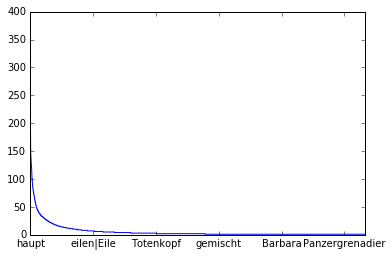

In [8]:
%matplotlib inline
comp1Freq.plot.line()




In [9]:
comp1Elems = np.asarray(comp1Freq.keys())
comp2Elems = np.asarray(comp2Freq.keys())

In [15]:
len(set(comp1Elems).intersection(comp2Elems))
allElems = set(comp1Elems).union(comp2Elems)

In [14]:
# common components in both = 3880

In [16]:
len(allElems)

14999

In [65]:
epsilon = 1E-10
freqDict = {}
for elem in allElems:
    if comp1Freq.has_key(elem):
        if comp2Freq.has_key(elem):
            freqDict[elem] = [comp1Freq[elem],comp2Freq[elem]]
        else:
            freqDict[elem] = [comp1Freq[elem],epsilon]
    else:
        if comp2Freq.has_key(elem):
            freqDict[elem] = [epsilon,comp2Freq[elem]]

In [66]:
freqDict['haupt']

[367, 1e-10]

In [69]:
def entropyFunc1(a,b):
    p = (a*1.0)/(1.0*(a+b))
    pNot = 1.0-p
    return -(p*math.log(p)+pNot*math.log(pNot))

In [90]:
entropyDict = {}
for elem in allElems:
    val = freqDict[elem]
    entropyDict[elem] = [entropyFunc1(val[0],val[1]),val[0],val[1]]

In [91]:
def sortDict(x):
    import operator
    sorted_x = sorted(x.items(), key=operator.itemgetter(1),reverse=True)
    return sorted_x

In [92]:
sortedEntr = sortDict(entropyDict)

In [93]:
# print sortedEntr

In [95]:
with open('entropyWithComponentsCount.csv', 'wb') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in sortedEntr:
        writer.writerow([key, value[0], value[1], value[2]])